In [20]:
import pandas as pd 
import numpy as np 
import sklearn 
from sklearn import linear_model 
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt 
import pickle
from matplotlib import style 

In [3]:
data = pd.read_csv("student-mat.csv" , sep=";")

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Student performance data 

In [5]:
data = data[['G1' , 'G2' , "G3" , "studytime" , 'failures' , 'absences']]

In [6]:
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


### perdict G3

In [29]:
predict = 'G3'
x = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])

In [30]:
from sklearn.model_selection import train_test_split
best =0
for _ in range(30):
    x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.1)



In [31]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x_train , y_train)
acc = model.score(x_test , y_test)
print(acc)

0.9237824520673643


In [10]:
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient: [ 0.15523058  0.96696042 -0.24756146 -0.42056438  0.04019417]
Intercept: -1.259862611972565


### These values show the influence of each feature on the final grade G3. A positive coefficient means an increase in the feature value will increase G3, while a negative coefficient means it will decrease G3
### In the context of linear regression, the intercept is the value where the regression line crosses the y-axis. It represents the predicted value of the dependent variable (y) when all the independent variables (x) are zero.

In [33]:
perdiction = model.predict(x_test)
# i am going to print all the perdiction and show you what the
#input data was for the perdiction 
for x in range(len(perdiction)):
    print(perdiction[x] , x_test[x] , y_test[x])





13.440002987053049 [14 13  1  0  6] 13
12.881623911384642 [13 13  3  0  7] 14
13.828562593061255 [13 14  2  0  0] 15
6.066501796498604 [7 7 3 0 6] 7
8.689083209217966 [8 9 1 0 8] 10
10.961641158659212 [13 11  3  0  8] 11
7.482154127233171 [ 7  8  2  0 12] 8
10.662964487885725 [11 11  2  0  2] 11
12.15335798516698 [12 12  2  0 12] 11
9.453404031517008 [ 9 10  2  0  4] 10
12.046507302145068 [14 12  2  1  8] 12
-0.9959593508135194 [7 0 3 0 0] 0
14.42065318584038 [15 14  2  0  8] 14
15.334168345819537 [16 15  2  0  2] 15
11.993926145364432 [10 12  2  0 16] 11
12.745448577946105 [14 12  2  0 20] 13
15.779407979889209 [17 15  1  0  4] 16
12.225467777329742 [12 12  2  0 14] 12
8.195204434034343 [ 9  9  2  2 11] 9
9.30157831945297 [ 8 10  2  0  4] 10
8.580918520973823 [8 9 1 0 5] 9
16.119331808722933 [15 16  3  0  7] 15
7.663742612862306 [ 9  8  2  1 16] 7
11.571504894510294 [12 12  3  0  2] 11
11.92942248094018 [11 12  2  0 10] 13
5.314761855292664 [7 6 1 0 0] 0
10.13537755953085 [ 8 11  2  0

In [ ]:
#  g1 g2 2 hrs study and thee g3 is 10 we got perdiction value as 8....

In [32]:
# save the model so we dont have to save again and agin 

"""if acc>best:
    best = acc
    with open("studentmodel.pickle", "wb")as f:
        pickle.dump(model , f)

pickle_in = open("studentmodel.pickle" , "rb")
model = pickle.load(pickle_in)"""

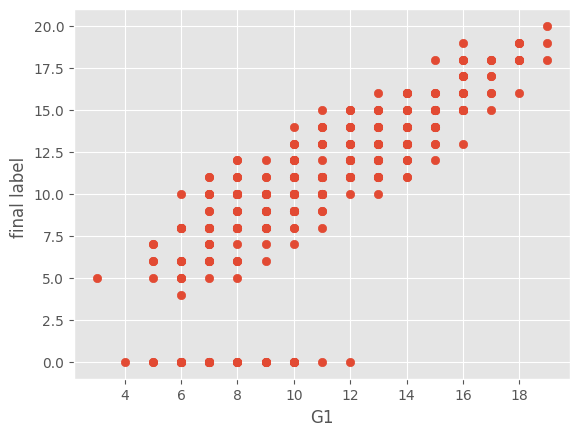

In [36]:
p = "G1"
style.use('ggplot')
plt.scatter(data[p] , data["G3"])
plt.xlabel(p)
plt.ylabel("final label ")
plt.show()

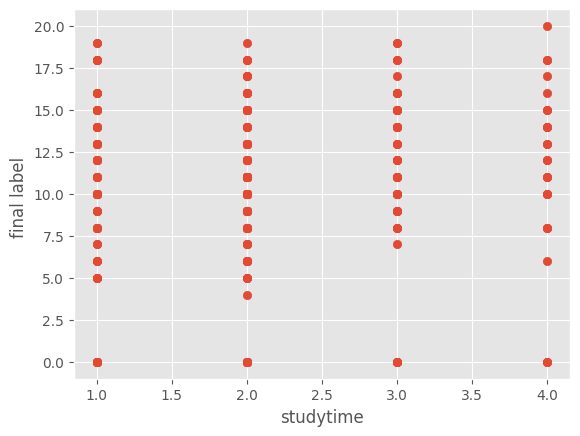

In [37]:
p = "studytime"
style.use('ggplot')
plt.scatter(data[p] , data["G3"])
plt.xlabel(p)
plt.ylabel("final label ")
plt.show()